In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [61]:
Dataset_path="Downloads/Bean_Dataset"
IMG_SIZE=(224,224)
SEED=42
BATCH_SIZE=32

In [62]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="training",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)
full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    subset="validation",
    validation_split=0.3,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds = full_valid_ds.take(val_size)
test_ds = full_valid_ds.take(val_size)

Found 990 files belonging to 3 classes.
Using 693 files for training.
Found 990 files belonging to 3 classes.
Using 297 files for validation.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
num_classes=len(train_ds.class_names)
model=Sequential([
    Flatten(input_shape=(224,224,3)), 
    Dense(512, activation='relu'),
    Dense(256,activation='relu'),
    Dense(num_classes,activation='softmax')
])

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_27 (Dense)            (None, 512)               77070848  
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 3)                 771       
                                                                 
Total params: 77,202,947
Trainable params: 77,202,947
Non-trainable params: 0
_________________________________________________________________


In [65]:
history= model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10)

Epoch 1/10
22/22 [==============================] - 12s 463ms/step - loss: 15808.8242 - accuracy: 0.3636 - val_loss: 2976.9360 - val_accuracy: 0.5500
Epoch 2/10
22/22 [==============================] - 8s 370ms/step - loss: 3267.7371 - accuracy: 0.4242 - val_loss: 1474.4275 - val_accuracy: 0.3938
Epoch 3/10
22/22 [==============================] - 9s 378ms/step - loss: 1409.4683 - accuracy: 0.4964 - val_loss: 1246.7507 - val_accuracy: 0.3562
Epoch 4/10
22/22 [==============================] - 9s 392ms/step - loss: 957.7808 - accuracy: 0.5094 - val_loss: 496.5081 - val_accuracy: 0.6062
Epoch 5/10
22/22 [==============================] - 9s 380ms/step - loss: 769.4840 - accuracy: 0.5397 - val_loss: 254.5217 - val_accuracy: 0.6687
Epoch 6/10
22/22 [==============================] - 9s 396ms/step - loss: 391.0763 - accuracy: 0.6176 - val_loss: 617.2080 - val_accuracy: 0.5938
Epoch 7/10
22/22 [==============================] - 9s 397ms/step - loss: 213.2158 - accuracy: 0.7157 - val_loss: 38

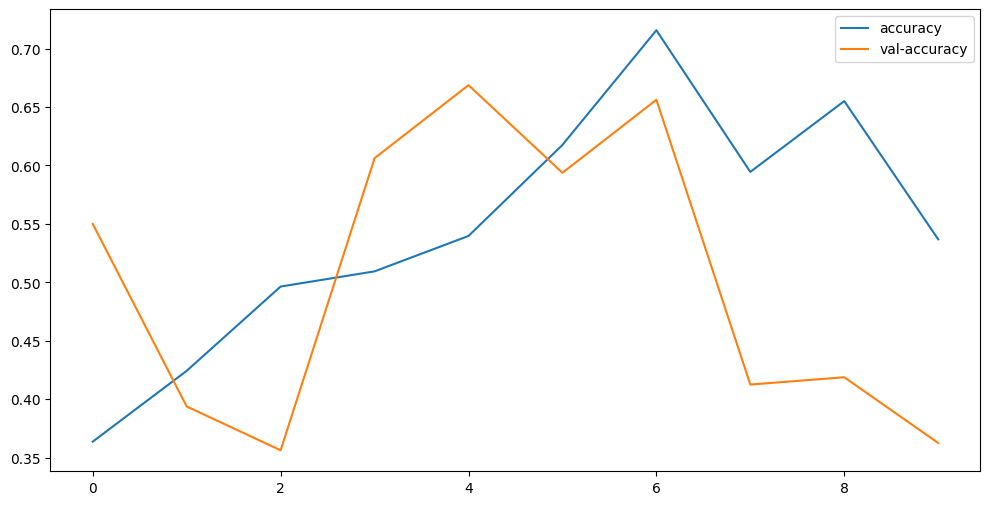

In [66]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val-accuracy')
plt.legend()
plt.show()

In [67]:
test_loss,test_accuracy = model.evaluate(valid_ds)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 1s 59ms/step - loss: 984.0597 - accuracy: 0.3125
Test Accuracy: 0.3125


In [68]:
y_pred=np.argmax(model.predict(test_ds),axis=-1)
y_true= np.concatenate([y for x, y in test_ds], axis=0)
class_names = train_ds.class_names

5/5 [==============================] - 1s 58ms/step


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Classification Report:
                   precision    recall  f1-score   support

angular_leaf_spot       0.32      0.98      0.48        50
        bean_rust       0.00      0.00      0.00        49
          healthy       0.20      0.02      0.03        61

         accuracy                           0.31       160
        macro avg       0.17      0.33      0.17       160
     weighted avg       0.18      0.31      0.16       160

Confusion Matrix:
[[49  0  1]
 [46  0  3]
 [60  0  1]]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m